🛒 Top Products and Their Sales by Shop:
shop_id       1     2     3     4     5     6     7     8     9     10  ...  \
product_id                                                              ...   
13          11.0  10.0   NaN   7.0   4.0  24.0   9.0  15.0   5.0   3.0  ...   
58          13.0   2.0   9.0   8.0   4.0   NaN   9.0   3.0   NaN   8.0  ...   
60           9.0   NaN   NaN   2.0   NaN  14.0  16.0   NaN  18.0  18.0  ...   
104          NaN   4.0   9.0   1.0  17.0   6.0   7.0  19.0  13.0   5.0  ...   
116          8.0   4.0   7.0  22.0   NaN  12.0   NaN   4.0  21.0   4.0  ...   
125         10.0   NaN   NaN  10.0   6.0   NaN  20.0  14.0   NaN   NaN  ...   
136         24.0   NaN   NaN  12.0   8.0  10.0   9.0   NaN  25.0  19.0  ...   
145          2.0  15.0  15.0   NaN   NaN   NaN   9.0   NaN  10.0   2.0  ...   
147         11.0   NaN   2.0   2.0   4.0   NaN  18.0  14.0  29.0   NaN  ...   
180          9.0   5.0   NaN   NaN   NaN   4.0   NaN  19.0   7.0   6.0  ...   

shop_id    

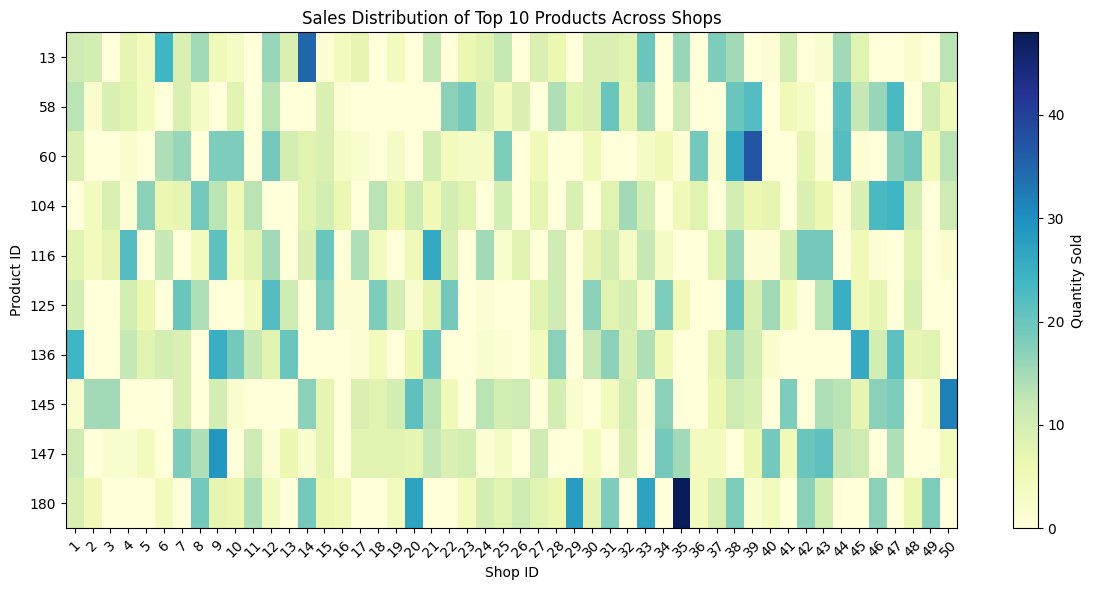

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('transactions.csv')

# Get top 10 products by total quantity sold
top_products = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter data for only these top products
top_products_data = df[df['product_id'].isin(top_products)]

# Group by Product ID and Shop ID to see distribution
product_shop_sales = top_products_data.groupby(['product_id', 'shop_id'])['quantity'].sum().unstack()

print("🛒 Top Products and Their Sales by Shop:")
print(product_shop_sales)

# Visualization (Heatmap of Shops vs Top Products)
plt.figure(figsize=(12, 6))
plt.imshow(product_shop_sales.fillna(0), cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Quantity Sold')
plt.title("Sales Distribution of Top 10 Products Across Shops")
plt.xlabel("Shop ID")
plt.ylabel("Product ID")
plt.xticks(range(len(product_shop_sales.columns)), product_shop_sales.columns, rotation=45)
plt.yticks(range(len(product_shop_sales.index)), product_shop_sales.index)
plt.tight_layout()
plt.show()